<h1><span style = "background-color : skyblue"> Artificial Neural Networks Template </span> </h1>
1 March, 2021 - <strong>Junyeong Ahn</strong>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Generating Random Data Set for Model

In [2]:
X = np.vstack( [(np.random.rand(10, 2) * 5), (np.random.rand(10, 2) * 10)] )
Y = np.hstack( ([0] * 10, [1] * 10))
dataset = pd.DataFrame(X, columns = {"X1", "X2"})
dataset["Y"] = Y

## Random DataSet Generated

In [3]:
dataset

,X1,X2,Y
0,2.483795,1.793659,0
1,3.337603,0.469203,0
2,0.714813,0.854079,0
3,1.257849,1.997500,0
4,3.582748,1.210699,0
5,4.496715,2.261474,0
6,4.096344,1.135429,0
7,4.798000,3.934992,0
8,3.419638,1.527106,0
9,0.989128,3.633260,0


## Plotting Dataset Values

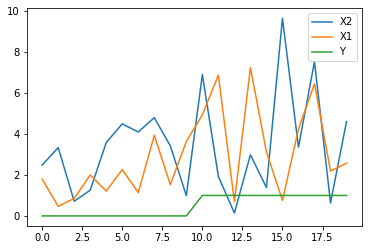

In [5]:
plt.plot(dataset, label = "Inline label")
plt.legend(["X2", "X1", "Y"])

## Converting Target Variable to Vector of # of Classes

In [6]:
Z = np.zeros( (20, 2))
for i in range(20):
    Z[i, Y[i]] = 1

In [7]:
X.shape

(20, 2)

## Initiating Random Weights and Bias

In [8]:
Wi_1 = np.random.randn(3, 2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3, 2)
Bi_2 = np.random.randn(2)

## Defining the Forward Propagation Function

In [11]:
def forward_prop(X, wi_1, Bi_1, Wi_2, Bi_2):
    
    # first layer
    M = 1 / (1 + np.exp( -(X.dot(Wi_1.T) + Bi_1)))
    
    # second layer
    A = M.dot(Wi_2) + Bi_2
    expA = np.exp(A)
    Y = expA / expA.sum(axis = 1, keepdims = True)
    return Y, M

In [18]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.00653246, 0.99346754],
        [0.00835829, 0.99164171],
        [0.0208888 , 0.9791112 ],
        [0.00718869, 0.99281131],
        [0.00735424, 0.99264576],
        [0.00698748, 0.99301252],
        [0.00744262, 0.99255738],
        [0.00632613, 0.99367387],
        [0.00702667, 0.99297333],
        [0.00420689, 0.99579311],
        [0.00718685, 0.99281315],
        [0.00328602, 0.99671398],
        [0.03602245, 0.96397755],
        [0.00364839, 0.99635161],
        [0.00469067, 0.99530933],
        [0.0076656 , 0.9923344 ],
        [0.0048379 , 0.9951621 ],
        [0.0070108 , 0.9929892 ],
        [0.00838223, 0.99161777],
        [0.00690186, 0.99309814]]),
 array([[9.49089013e-01, 4.30110224e-01, 1.69513360e-02],
        [9.48256216e-01, 1.31198860e-01, 6.18276779e-03],
        [5.60069474e-01, 6.78113344e-01, 7.16729992e-02],
        [8.45083091e-01, 7.24219194e-01, 5.31954500e-02],
        [9.76604532e-01, 1.61136203e-01, 5.56449145e-03],
        [9.96071635e-01, 1.3

## Back Propagation by Differentiating or Gradient Descent

In [19]:
# Returns gradient for Weight_2
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z - Y)

In [21]:
# Returns gradient for Weight_1
def diff_Wi_1(X, H, Z, output, Wi_2):
    dZ = (Z - output).dot(Wi_2.T) * H * (1 - H)
    return X.T.dot(dZ)

In [23]:
# Returns derivative for both bias
def diff_B2(Z, Y):
    return (Z - Y).sum(axis = 0)

def diff_B1(Z, Y, Wi_2, H):
    return ((Z - Y).dot(Wi_2.T) * H * (1 - H)).sum(axis = 0)

In [25]:
lr = 1e-3
for epoch in range(5000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += lr * diff_Wi_2(hidden, Z, output)
    Bi_2 += lr * diff_B2(Z, output)
    Wi_1 += lr * diff_Wi_1(X, hidden, Z, output, Wi_2).T
    Bi_1 += lr * diff_B1(Z, output, Wi_2, hidden)

## Generating Prediction at New Datapoint

In [27]:
X_test = np.array([5, 7])

hidden_output = 1 / (1 + np.exp(-X_test.dot(Wi_1.T) - Bi_1))
Outer_layer_output = hidden_output.dot(Wi_2) + Bi_2
expA = np.exp(Outer_layer_output)
Y = expA / expA.sum()
print(" prob of class 0 >>>>>>>> {} \n prob of class 1 >>>>>>>> {}".format(Y[0], Y[1]))

 prob of class 0 >>>>>>>> 0.020778430736444618 
 prob of class 1 >>>>>>>> 0.9792215692635553


<h2> <span style = "background-color : yellow"> Main Part</span> <h2>

In [12]:
optimizer = Adam(0.0002, 0.5) # Learning rate and momentum

# Build and compile the discriminator first.
# Generator will be trained as part of the compined model, later.
# Pick the loss function and the type of metric to keep track.
# Binary cross entropy as we are doing prediction and it is a better loss function compared to MSE or others.
discriminator = build_discriminator()
discriminator.compile(loss = "binary_crossentropy",
                     optimizer = optimizer,
                     metrics = ["accuracy"])

# Build and compile our Discriminator, pick the loss function
# Since we are only generating (faking) images, let us not track any metrics.
generator = build_generator()
generator.compile(loss = "binary_crossentropy", optimizer = optimizer)

# This builds the Generator and defines the input noise.
# In a GAN the Generator network takes noise z as an input to produce its images.
z = Input(shape = (100,)) # Our random input to the generator
img = generator(z)

# This ensures that when we combine our networks *we only train the Generator*.
# While Generator training we do not want Discriminator weights to be adjusted.
# This dosen't affect the above Discriminator training.
discriminator.trainable = False

# This specifies that our Discriminator will take the images generated by our Generator
# and true dataset and set its output to a parameter called valid, which whill indicate
# whether the input is real or not.
valid = discriminator(img) # Validity check on the generated image

# Here we combined the models and also set our loss function and optimizer.
# Again, we are only training the Generator here.
# The ultimate goal here is for the Generator to fool the Discriminator.
# The combined model (stacked Gen. and Discr.) takes noise as input => generates images => determines validity
combined = Model(z, valid) # Input(z) : image / Output(valid) : validity
combined.compile(loss = "binary_crossentropy", optimizer = optimizer)

train(epochs = 2000, batch_size = 32, save_interval = 20)

# Save model for future use to generate fake images
# Not tested yet..l make sure right model is being saved..
# Compare with GAN4

generator.save("generator_model_test.h5") # Test the model on GAN4_predict...

# Epochs dictate the number of backward and forward propagations, the batch_size
# indicates the number of training smaples per backward/forward propagation, and
# sample_interval specifies after how many epochs we call our sample_image function


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________